In [1]:
%cd result

/home/dcsmahasiswa1/adversarial-multitask-learning/result


In [2]:
import os

files = [f for f in os.listdir() if os.path.isfile(f)]

In [3]:
import pickle
import pandas as pd


# Read dictionary pkl file
with open(files[0], 'rb') as fp:
    person = pickle.load(fp)

recap_acc = person['result']

df = pd.DataFrame.from_records(recap_acc)
df['gl_'] = df['gl_'].map(lambda x: x[-1].numpy())
df['al_'] = df['al_'].map(lambda x: x[-1].numpy())
df['cl_'] = df['cl_'].map(lambda x: x[-1].numpy())
df['dl_'] = df['dl_'].map(lambda x: x[-1].numpy())
df['tl_'] = df['tl_'].map(lambda x: x[-1].numpy())

df['acc_source_'] = df['acc_source_'].map(lambda x: x[-1].numpy())
df['acc_target_'] = df['acc_target_'].map(lambda x: x[-1].numpy())
df['acc_source_val_'] = df['acc_source_val_'].map(lambda x: x[-1].numpy())

df_atas = df
 
    
    ########################################

for file in files[1:]:
    
    print(file)
    
    with open(file, 'rb') as fp:
        person = pickle.load(fp)
    

    recap_acc = person['result']

    df = pd.DataFrame.from_records(recap_acc)
    df['gl_'] = df['gl_'].map(lambda x: x[-1].numpy())
    df['al_'] = df['al_'].map(lambda x: x[-1].numpy())
    df['cl_'] = df['cl_'].map(lambda x: x[-1].numpy())
    df['dl_'] = df['dl_'].map(lambda x: x[-1].numpy())
    df['tl_'] = df['tl_'].map(lambda x: x[-1].numpy())

    df['acc_source_'] = df['acc_source_'].map(lambda x: x[-1].numpy())
    df['acc_target_'] = df['acc_target_'].map(lambda x: x[-1].numpy())
    df['acc_source_val_'] = df['acc_source_val_'].map(lambda x: x[-1].numpy())

    df_bawah = df

    df_atas = pd.concat([df_atas, df_bawah],ignore_index=True)

df = df_atas

2024-01-10 03:48:31.646157: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-10 03:48:31.771641: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-10 03:48:32.293618: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-10 03:48:32.293667: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

amazon_webcam = 0-0.1-0.3.pkl
amazon_webcam = 0-0-0.pkl
amazon_webcam = 0-0-0.6.pkl
amazon_webcam = 0-0-0.3.pkl
amazon_webcam = 0-0-0.1.pkl
amazon_webcam = 0-0.1-0.1.pkl
amazon_webcam = 0-0-0.01.pkl


In [4]:
df.head()

,W_CATEGORICAL,W_ADVERSARIAL,W_DOMAIN,gl_,al_,cl_,dl_,tl_,acc_source_,acc_target_,acc_source_val_
0,0,0.1,0.0,86.841736,-0.905500,0.811919,-0.365023,-0.090550,0.861111,0.328125,0.554174
1,0,0.1,0.3,29.541548,-0.269104,1.283224,0.093096,0.001018,0.663194,0.140625,0.531083
2,0,0.0,0.0,0.381350,1.941231,0.007874,-0.992808,0.000000,1.000000,0.414931,0.616341
3,0,0.0,0.6,0.604573,1.048048,1.841660,0.044852,0.026911,0.494792,0.138889,0.388988
4,0,0.0,0.3,0.344448,1.795741,1.239940,0.036940,0.011082,0.675347,0.272569,0.543517


In [5]:
df[['W_CATEGORICAL', 'W_ADVERSARIAL', 'W_DOMAIN','acc_source_', 'acc_target_', 'acc_source_val_']].corr().style.background_gradient(cmap ='coolwarm') 

/home/dcsmahasiswa1/.local/lib/python3.8/site-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/dcsmahasiswa1/.local/lib/python3.8/site-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,W_CATEGORICAL,W_ADVERSARIAL,W_DOMAIN,acc_source_,acc_target_,acc_source_val_
W_CATEGORICAL,nan,nan,nan,nan,nan,nan
W_ADVERSARIAL,nan,1.000000,-0.168444,0.273903,0.069859,0.329921
W_DOMAIN,nan,-0.168444,1.000000,-0.248972,-0.351867,-0.035317
acc_source_,nan,0.273903,-0.248972,1.000000,0.909634,0.947230
acc_target_,nan,0.069859,-0.351867,0.909634,1.000000,0.788701
acc_source_val_,nan,0.329921,-0.035317,0.947230,0.788701,1.000000


In [6]:
df[['W_CATEGORICAL', 'W_ADVERSARIAL', 'W_DOMAIN','gl_', 'al_', 'cl_', 'dl_', 'tl_']].corr().style.background_gradient(cmap ='coolwarm') 

/home/dcsmahasiswa1/.local/lib/python3.8/site-packages/pandas/io/formats/style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/home/dcsmahasiswa1/.local/lib/python3.8/site-packages/pandas/io/formats/style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,W_CATEGORICAL,W_ADVERSARIAL,W_DOMAIN,gl_,al_,cl_,dl_,tl_
W_CATEGORICAL,nan,nan,nan,nan,nan,nan,nan,nan
W_ADVERSARIAL,nan,1.000000,-0.168444,0.826893,-0.927011,-0.168611,0.268185,-0.654138
W_DOMAIN,nan,-0.168444,1.000000,-0.305771,-0.005061,0.140289,0.591366,0.600357
gl_,nan,0.826893,-0.305771,1.000000,-0.847681,-0.245284,0.013188,-0.924379
al_,nan,-0.927011,-0.005061,-0.847681,1.000000,0.062983,-0.224695,0.635518
cl_,nan,-0.168611,0.140289,-0.245284,0.062983,1.000000,0.362936,0.226519
dl_,nan,0.268185,0.591366,0.013188,-0.224695,0.362936,1.000000,0.197850
tl_,nan,-0.654138,0.600357,-0.924379,0.635518,0.226519,0.197850,1.000000


In [7]:
df.style.background_gradient(cmap ='coolwarm') 

,W_CATEGORICAL,W_ADVERSARIAL,W_DOMAIN,gl_,al_,cl_,dl_,tl_,acc_source_,acc_target_,acc_source_val_
0,0,0.100000,0.000000,86.841736,-0.905500,0.811919,-0.365023,-0.090550,0.861111,0.328125,0.554174
1,0,0.100000,0.300000,29.541548,-0.269104,1.283224,0.093096,0.001018,0.663194,0.140625,0.531083
2,0,0.000000,0.000000,0.381350,1.941231,0.007874,-0.992808,0.000000,1.000000,0.414931,0.616341
3,0,0.000000,0.600000,0.604573,1.048048,1.841660,0.044852,0.026911,0.494792,0.138889,0.388988
4,0,0.000000,0.300000,0.344448,1.795741,1.239940,0.036940,0.011082,0.675347,0.272569,0.543517
5,0,0.000000,0.100000,0.096579,2.721468,1.127688,-0.017909,-0.001791,0.680556,0.175347,0.497336
6,0,0.100000,0.100000,32.073410,-0.343701,1.500075,0.084194,-0.025951,0.682292,0.213542,0.511545
7,0,0.000000,0.010000,0.155342,1.677937,3.317654,-0.361188,-0.003612,0.190972,0.057292,0.134991


In [8]:
def plot_loss_values(gl_, al_, cl_, dl_, tl_):
    x = np.arange(len(gl_))

    plt.plot(x, gl_, label = "generative loss", linestyle="-.")
    plt.plot(x, al_, label = "adversarial loss", linestyle="-")
    plt.plot(x, cl_, label = "categorical loss", linestyle="--")
    plt.plot(x, dl_, label = "domain loss", linestyle=":")
    plt.plot(x, tl_, label = "total loss", linestyle=(0, (3, 1, 1, 1)))
    plt.legend()
    plt.show()

In [9]:
def plot_acc_values(acc_source_, acc_target_, acc_source_val_):
    x = np.arange(len(acc_source_))
    plt.plot(x, acc_source_, label = "source acc", linestyle="-")
    plt.plot(x, acc_target_, label = "target acc", linestyle=":")
    plt.plot(x, acc_source_val_, label = "val acc", linestyle="-.")
    plt.legend()
    plt.show()

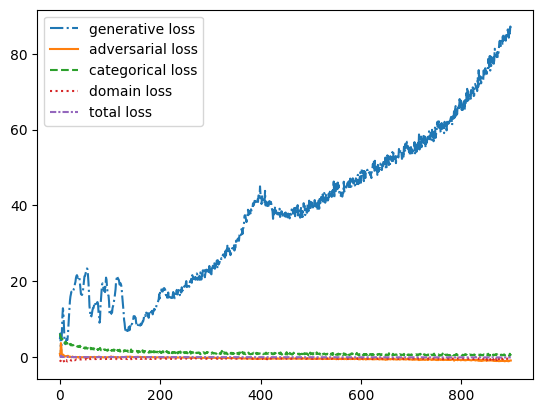

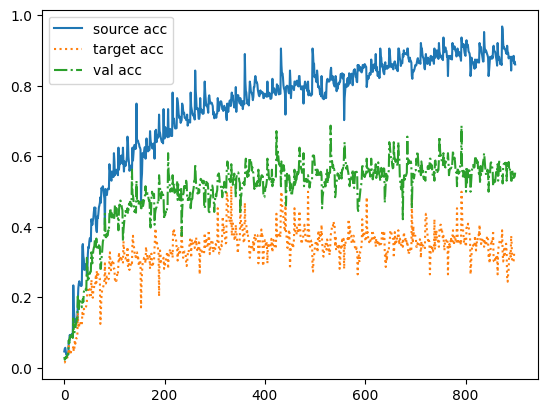

In [14]:
import numpy as np
import matplotlib.pyplot as plt


with open(files[0], 'rb') as fp:
    person = pickle.load(fp)

i = 0
plot_loss_values(person['result'][i]['gl_'], person['result'][i]['al_'], person['result'][i]['cl_'], person['result'][i]['dl_'], person['result'][i]['tl_'])
plot_acc_values(person['result'][i]['acc_source_'], person['result'][i]['acc_target_'], person['result'][i]['acc_source_val_'])